# Report

### Preprocessing 
setting up data to train baseline models of logistic regression and decision trees with all features

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix


In [2]:
# moving up a directory to access project folder
os.chdir('..')

In [3]:
# grabbing csv from data folder and loading into df
csv_file_path = 'data/tiktok_dataset.csv'
tiktok_dataset = pd.read_csv(csv_file_path)


In [4]:
tiktok_dataset.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


`variable name` | **type** | Description

`claim_status` | **obj**	| Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source.

`video_id`	| **int**	| Random identifying number assigned to video upon publication on TikTok.

`video_duration_sec`| 	**int**	|  How long the published video is measured in seconds.

`video_transcription_text`	| **obj**	| Transcribed text of the words spoken in the published video.

`verified_status`	| **obj**	| Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.”

`author_ban_status`	| **obj**	| Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.”

`video_view_count`	| **float**	| The total number of times the published video has been viewed.

`video_like_count`	| **float** | The total number of times the published video has been liked by other users.

`video_share_count`	| **float** | The total number of times the published video has been shared by other users.

`video_download_count`| 	**float**| The total number of times the published video has been downloaded by other users.

`video_comment_count`		| **float**| The total number of comments on the published video.

In [5]:
tiktok_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
tiktok_dataset['author_ban_status'].value_counts()

author_ban_status
active          15663
under review     2080
banned           1639
Name: count, dtype: int64

In [7]:
tiktok_dataset.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [8]:
# Drop rows with missing values
tiktok_dataset = tiktok_dataset.dropna(axis=0)

In [9]:
tiktok_dataset.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [10]:
# Check for duplicates
tiktok_dataset.duplicated().sum()

np.int64(0)

In [11]:
tiktok_dataset.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [12]:
tiktok_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


In [13]:
tiktok_dataset.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [14]:
# binary classification: 'active user' vs 'suspicous user' (under review or banned)
tiktok_dataset['user_status'] = tiktok_dataset['author_ban_status'].apply(
                                                                        lambda x: 'active' 
                                                                        if x == 'active' else 'suspicious')

In [15]:
# sorting features
numeric_features = [
        'video_duration_sec', 
        'video_view_count', 
        'video_like_count', 
        'video_share_count', 
        'video_download_count', 
        'video_comment_count'
]

categorical_features = ['claim_status','verified_status']

text_features = ['video_transcription_text']


In [16]:
# setup for X and y
X = tiktok_dataset[numeric_features + categorical_features + text_features].copy()
y = LabelEncoder().fit_transform(tiktok_dataset['user_status'].copy())

In [17]:
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status,verified_status,video_transcription_text
0,59,343296.0,19425.0,241.0,1.0,0.0,claim,not verified,someone shared with me that drone deliveries a...
1,32,140877.0,77355.0,19034.0,1161.0,684.0,claim,not verified,someone shared with me that there are more mic...
2,31,902185.0,97690.0,2858.0,833.0,329.0,claim,not verified,someone shared with me that american industria...
3,25,437506.0,239954.0,34812.0,1234.0,584.0,claim,not verified,someone shared with me that the metro of st. p...
4,19,56167.0,34987.0,4110.0,547.0,152.0,claim,not verified,someone shared with me that the number of busi...


In [18]:
y[:5]

array([1, 0, 0, 0, 0])

In [19]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(15267, 9)

In [21]:
X_test.shape

(3817, 9)

In [22]:
# Preprocessing for numeric features
numeric_transformer = StandardScaler()
    
# Preprocessing for categorical features
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Preprocessing for text features
text_transformer = CountVectorizer(
    max_features=100,  # Limit to top 100 features
    stop_words='english',
    lowercase=True
)

In [23]:
# Check shapes of data before transformation
print(X_train[numeric_features].shape)
print(X_train[categorical_features].shape)
print(X_train['video_transcription_text'].shape)

# Apply transformations individually
numeric_data = numeric_transformer.fit_transform(X_train[numeric_features])
categorical_data = categorical_transformer.fit_transform(X_train[categorical_features])
text_data = text_transformer.fit_transform(X_train['video_transcription_text'])

# Check if transformed data has matching row counts
print(numeric_data.shape)
print(categorical_data.shape)
print(text_data.shape)


(15267, 6)
(15267, 2)
(15267,)
(15267, 6)
(15267, 2)
(15267, 100)


In [24]:
text_transformer.vocabulary_

{'learned': np.int64(44),
 'media': np.int64(47),
 'claim': np.int64(15),
 'people': np.int64(60),
 'colleagues': np.int64(19),
 'feel': np.int64(30),
 'used': np.int64(90),
 'colleague': np.int64(18),
 'article': np.int64(4),
 'mentioning': np.int64(49),
 'discovered': np.int64(23),
 '20': np.int64(2),
 'friends': np.int64(35),
 'opinion': np.int64(59),
 'grow': np.int64(36),
 'family': np.int64(28),
 'sentiment': np.int64(73),
 'size': np.int64(75),
 'understanding': np.int64(89),
 'say': np.int64(72),
 'world': np.int64(97),
 'american': np.int64(3),
 'radio': np.int64(65),
 'largest': np.int64(43),
 'brain': np.int64(12),
 'online': np.int64(58),
 'internet': np.int64(41),
 'forum': np.int64(33),
 'single': np.int64(74),
 'car': np.int64(13),
 'million': np.int64(51),
 'miles': np.int64(50),
 'impression': np.int64(40),
 'oldest': np.int64(57),
 'view': np.int64(92),
 'moon': np.int64(53),
 'sleep': np.int64(76),
 'longest': np.int64(45),
 'recorded': np.int64(68),
 'friend': np.in

In [25]:
# Get the vocabulary as a dictionary
vocab = text_transformer.vocabulary_

# Create text column names using the actual words
text_cols = [key for key, value in sorted(vocab.items(), key=lambda x: x[1])]

In [26]:
text_cols

['000',
 '100',
 '20',
 'american',
 'article',
 'australia',
 'average',
 'belief',
 'believe',
 'best',
 'bet',
 'board',
 'brain',
 'car',
 'cats',
 'claim',
 'claimed',
 'claiming',
 'colleague',
 'colleagues',
 'convinced',
 'day',
 'days',
 'discovered',
 'discussion',
 'earth',
 'expert',
 'eyes',
 'family',
 'fastest',
 'feel',
 'feeling',
 'feet',
 'forum',
 'friend',
 'friends',
 'grow',
 'human',
 'humans',
 'hypothesis',
 'impression',
 'internet',
 'islands',
 'largest',
 'learned',
 'longest',
 'mars',
 'media',
 'mentioned',
 'mentioning',
 'miles',
 'million',
 'mobile',
 'moon',
 'new',
 'news',
 'number',
 'oldest',
 'online',
 'opinion',
 'people',
 'planet',
 'point',
 'population',
 'position',
 'radio',
 'read',
 'reasoning',
 'recorded',
 'report',
 'reported',
 'revealed',
 'say',
 'sentiment',
 'single',
 'size',
 'sleep',
 'social',
 'solar',
 'study',
 'sun',
 'taste',
 'think',
 'thinking',
 'time',
 'times',
 'told',
 'tv',
 'understand',
 'understanding',


In [27]:
# transformed df
X_transformed = np.hstack([
    numeric_data, 
    categorical_data, 
    text_data.toarray()
])


In [28]:

# Combine column names
numeric_cols = numeric_features
categorical_cols = categorical_transformer.get_feature_names_out(categorical_features)

transformed_columns = list(numeric_cols) + list(categorical_cols) + text_cols

In [29]:

# Create DataFrame
X_train_transformed = pd.DataFrame(X_transformed, columns=transformed_columns)

In [30]:
X_train_transformed.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,verified_status_verified,000,100,...,used,venus,view,wager,water,website,willing,world,year,years
0,0.840634,0.860305,1.383220,1.916528,2.279901,-0.404850,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.025259,-0.774693,-0.622519,-0.508266,-0.508593,-0.430014,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.332967,0.747300,-0.501922,-0.340870,-0.373979,-0.427497,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.332967,2.187249,-0.578011,-0.450047,-0.466214,-0.369621,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.963717,-0.763122,-0.617837,-0.521944,-0.523051,-0.440079,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X_train_transformed.drop('verified_status_verified', axis=1, inplace=True)
X_train_transformed.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,000,100,20,...,used,venus,view,wager,water,website,willing,world,year,years
0,0.840634,0.860305,1.383220,1.916528,2.279901,-0.404850,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.025259,-0.774693,-0.622519,-0.508266,-0.508593,-0.430014,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.332967,0.747300,-0.501922,-0.340870,-0.373979,-0.427497,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.332967,2.187249,-0.578011,-0.450047,-0.466214,-0.369621,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.963717,-0.763122,-0.617837,-0.521944,-0.523051,-0.440079,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
numeric_test_data = numeric_transformer.transform(X_test[numeric_features])
categorical_test_data = categorical_transformer.transform(X_test[categorical_features])
text_test_data = text_transformer.transform(X_test['video_transcription_text'])

In [33]:
X_test_transformed = np.hstack([
    numeric_test_data, 
    categorical_test_data, 
    text_test_data.toarray()
])


In [34]:
X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformed_columns)
X_test_transformed.drop('verified_status_verified', axis=1, inplace=True)

### Training Baseline
Using all features to make baseline model to measure performance

In [35]:
# Logistic Regression
lr_model = LogisticRegression(
    random_state=42, 
    max_iter=1000
)
lr_model.fit(X_train_transformed, y_train)
lr_predictions = lr_model.predict(X_test_transformed)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Logistic Regression Classification Report:\n", 
    classification_report(y_test, lr_predictions))


Logistic Regression Accuracy: 0.8053445113963846
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      3074
           1       0.00      0.00      0.00       743

    accuracy                           0.81      3817
   macro avg       0.40      0.50      0.45      3817
weighted avg       0.65      0.81      0.72      3817



/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/takosaga/miniconda3/envs/report_assignment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [36]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_transformed, y_train)
dt_predictions = dt_model.predict(X_test_transformed)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", 
    classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.7215090385119204
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      3074
           1       0.29      0.29      0.29       743

    accuracy                           0.72      3817
   macro avg       0.56      0.56      0.56      3817
weighted avg       0.72      0.72      0.72      3817



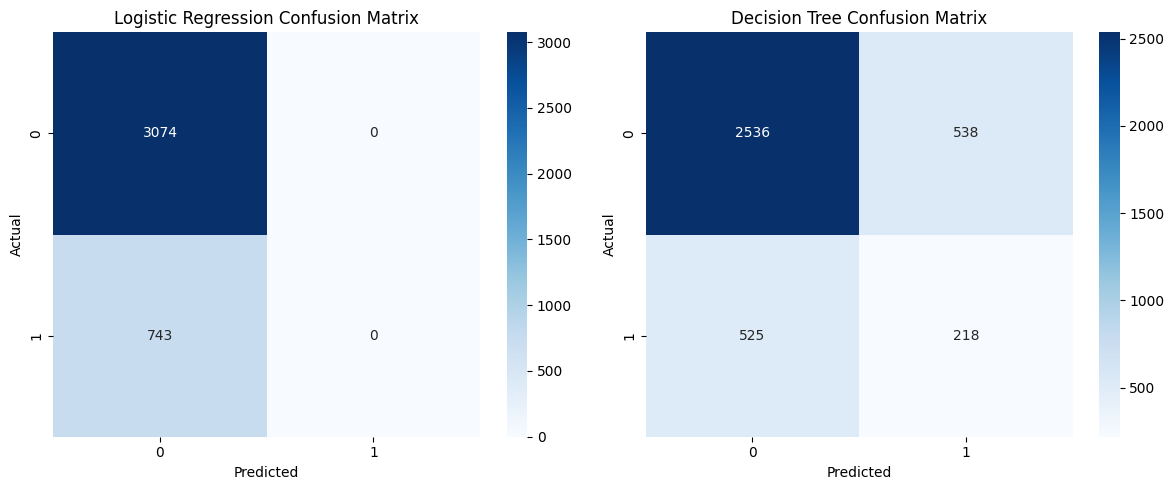

In [37]:

# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, lr_predictions)
cm_dt = confusion_matrix(y_test, dt_predictions)

# Plot heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### EDA
Understanding which features are to be excluded/included

In [38]:
tiktok_dataset.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


#### View Count

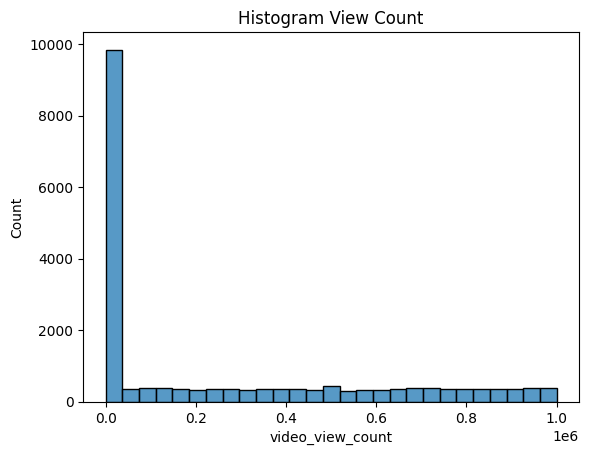

In [39]:
sns.histplot(tiktok_dataset['video_view_count'])
plt.title('Histogram View Count')
plt.show()

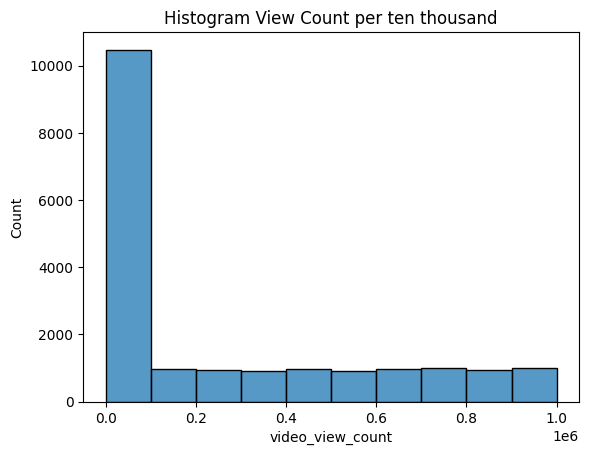

In [40]:
sns.histplot(tiktok_dataset['video_view_count'], bins=range(0, (10**6+1),10**5))
plt.title('Histogram View Count per ten thousand')
plt.show()

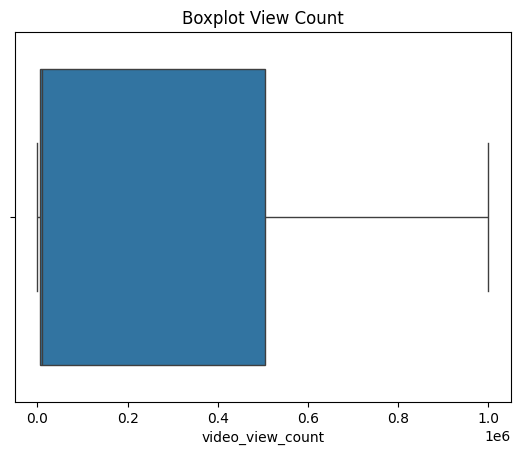

In [41]:
sns.boxplot(x=tiktok_dataset['video_view_count'])
plt.title('Boxplot View Count')
plt.show()


#### Duration

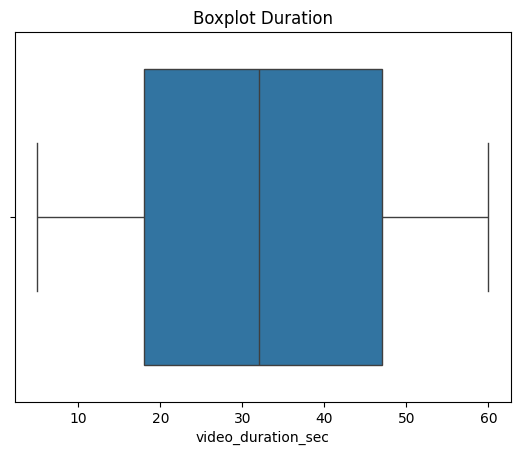

In [42]:

plt.title('Boxplot Duration')
sns.boxplot(x=tiktok_dataset['video_duration_sec']);

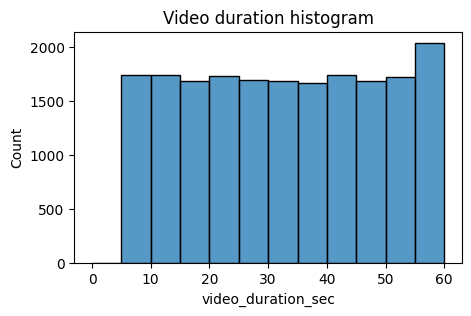

In [43]:
plt.figure(figsize=(5,3))
sns.histplot(tiktok_dataset['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram');

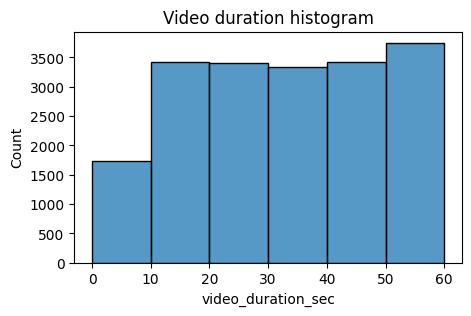

In [44]:
plt.figure(figsize=(5,3))
sns.histplot(tiktok_dataset['video_duration_sec'], bins=range(0,61,10))
plt.title('Video duration histogram');

#### Likes

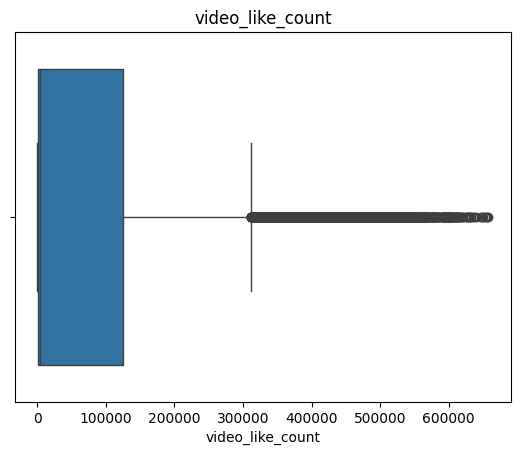

In [45]:
plt.title('video_like_count')
sns.boxplot(x=tiktok_dataset['video_like_count']);

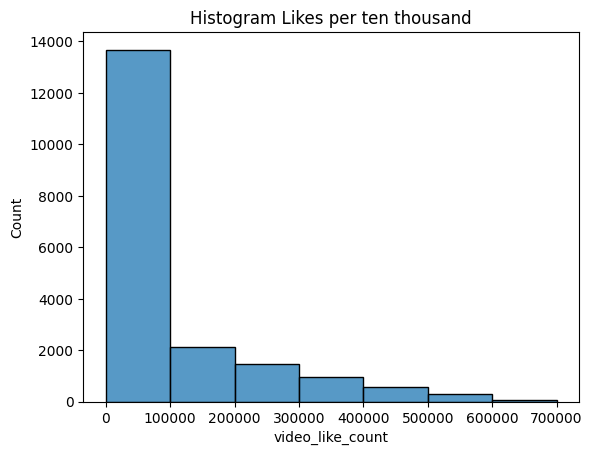

In [46]:
sns.histplot(tiktok_dataset['video_like_count'], bins=range(0,(7*10**5+1),10**5))
plt.title('Histogram Likes per ten thousand')
plt.show()

#### Comments

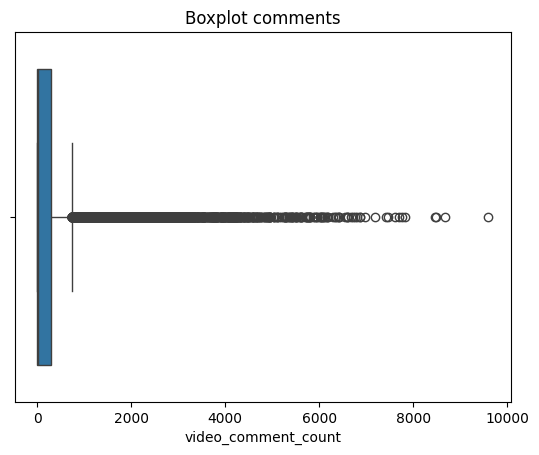

In [47]:
plt.title('Boxplot comments')
sns.boxplot(x=tiktok_dataset['video_comment_count']);

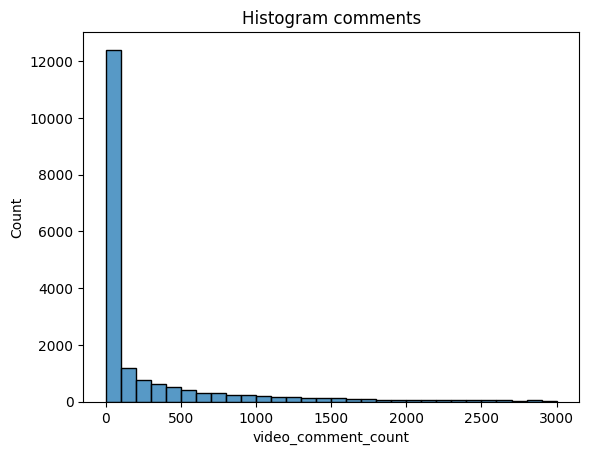

In [48]:
sns.histplot(tiktok_dataset['video_comment_count'], bins=range(0,(3001),100))
plt.title('Histogram comments');

#### Share

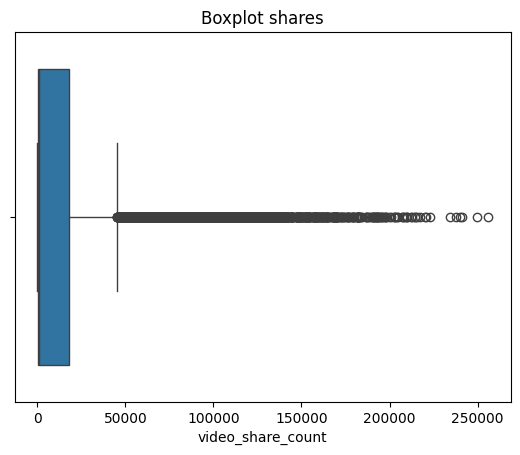

In [49]:
plt.title('Boxplot shares')
sns.boxplot(x=tiktok_dataset['video_share_count']);

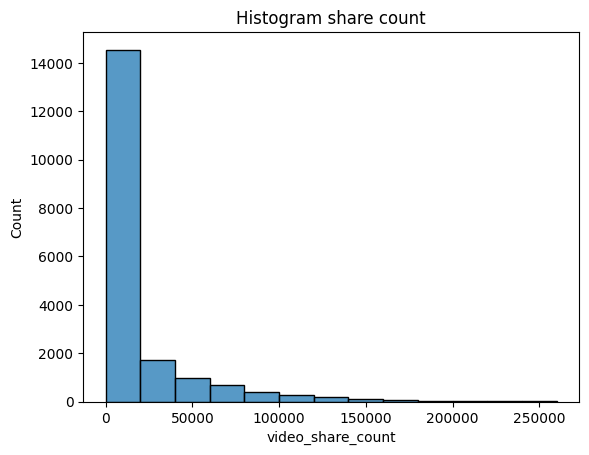

In [50]:
sns.histplot(tiktok_dataset['video_share_count'], bins=range(0,(270001),20000))
plt.title('Histogram share count');

#### Downloads

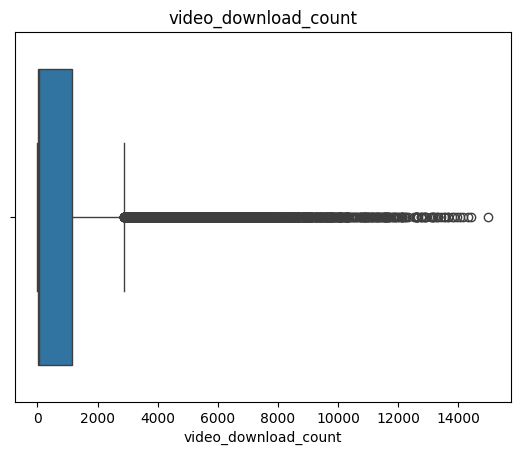

In [51]:
plt.title('video_download_count')
sns.boxplot(x=tiktok_dataset['video_download_count']);

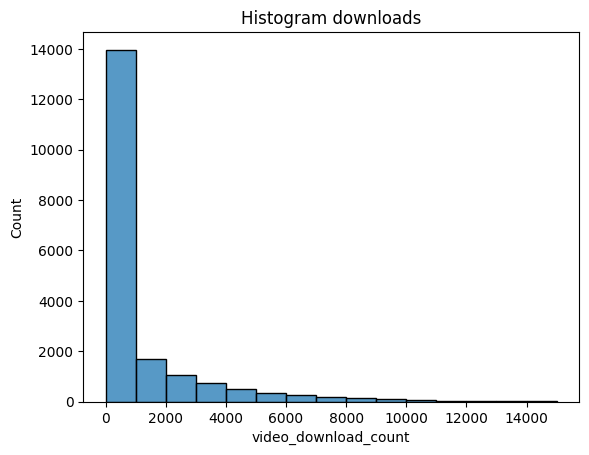

In [52]:
sns.histplot(tiktok_dataset['video_download_count'], bins=range(0,(15001),1000))
plt.title('Histogram downloads');

#### User status by claim

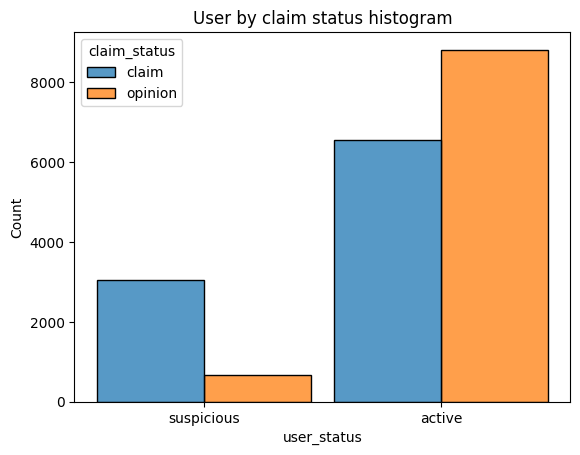

In [53]:
sns.histplot(data=tiktok_dataset,
             x='user_status',
             hue='claim_status',
             multiple='dodge',
             shrink=0.9)
plt.title('User by claim status histogram');

#### User status by verification

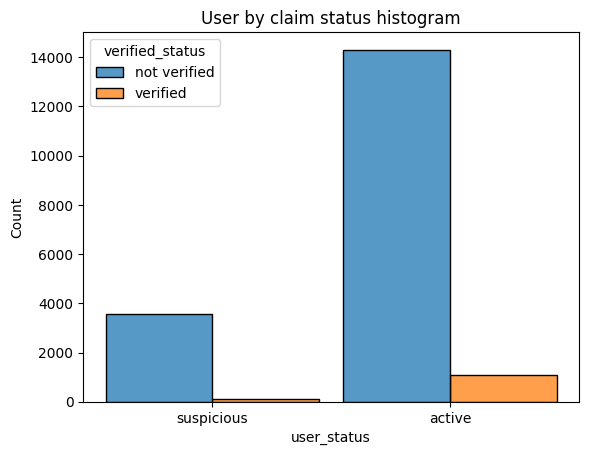

In [54]:
sns.histplot(data=tiktok_dataset,
             x='user_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('User by claim status histogram');

#### Numerical Heatmap

In [63]:
tiktok_dataset[numeric_features]

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,59,343296.0,19425.0,241.0,1.0,0.0
1,32,140877.0,77355.0,19034.0,1161.0,684.0
2,31,902185.0,97690.0,2858.0,833.0,329.0
3,25,437506.0,239954.0,34812.0,1234.0,584.0
4,19,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...
19079,49,6067.0,423.0,81.0,8.0,2.0
19080,23,2973.0,820.0,70.0,3.0,0.0
19081,50,734.0,102.0,7.0,2.0,1.0
19082,8,3394.0,655.0,123.0,11.0,4.0


In [64]:
num_matrix = tiktok_dataset[numeric_features].corr()

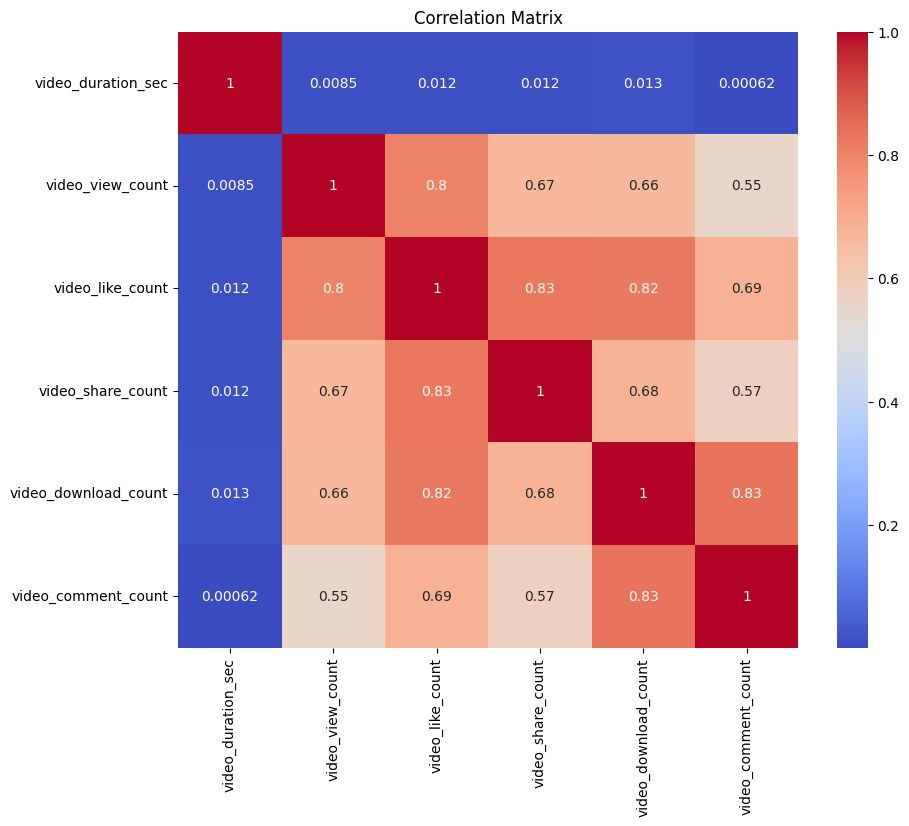

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(num_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()